# Exercise 1

Calculate the number of scored and lost goals per season for the team of your preference.

- filter the matches to get only those with our team - please do a copy of it (`.copy`)
- using .apply extract team and opponent goals
- use groupby and aggregate to groupby matches by season and the aggregate them on team and opponent goals using sum

In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/piotrgradzinski/dap_20230114/raw/main/day_6_pgg/matches.csv'
matches = pd.read_csv(url, parse_dates=['date'])
matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
0,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,2008-08-17,2008/2009,1,1
1,Belgium,Belgium Jupiler League,SV Zulte-Waregem,Sporting Lokeren,2008-08-16,2008/2009,0,0
2,Belgium,Belgium Jupiler League,KSV Cercle Brugge,RSC Anderlecht,2008-08-16,2008/2009,0,3
3,Belgium,Belgium Jupiler League,KAA Gent,RAEC Mons,2008-08-17,2008/2009,5,0
4,Belgium,Belgium Jupiler League,FCV Dender EH,Standard de Liège,2008-08-16,2008/2009,1,3
...,...,...,...,...,...,...,...,...
25974,Switzerland,Switzerland Super League,FC St. Gallen,FC Thun,2015-09-22,2015/2016,1,0
25975,Switzerland,Switzerland Super League,FC Vaduz,FC Luzern,2015-09-23,2015/2016,1,2
25976,Switzerland,Switzerland Super League,Grasshopper Club Zürich,FC Sion,2015-09-23,2015/2016,2,0
25977,Switzerland,Switzerland Super League,Lugano,FC Zürich,2015-09-22,2015/2016,0,0


In [5]:
team = 'Wisła Kraków'
team_matches = matches[(matches.home_team == team) | (matches.away_team == team)].copy()
team_matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal
15721,Poland,Poland Ekstraklasa,Wisła Kraków,Polonia Bytom,2008-08-09,2008/2009,1,0
15730,Poland,Poland Ekstraklasa,Legia Warszawa,Wisła Kraków,2008-10-26,2008/2009,2,1
15742,Poland,Poland Ekstraklasa,Wisła Kraków,Ruch Chorzów,2008-11-02,2008/2009,2,0
15746,Poland,Poland Ekstraklasa,Wisła Kraków,Widzew Łódź,2008-11-08,2008/2009,0,0
15755,Poland,Poland Ekstraklasa,Odra Wodzisław,Wisła Kraków,2008-11-12,2008/2009,0,2
...,...,...,...,...,...,...,...,...
17602,Poland,Poland Ekstraklasa,Wisła Kraków,Lechia Gdańsk,2015-08-16,2015/2016,3,3
17609,Poland,Poland Ekstraklasa,Pogoń Szczecin,Wisła Kraków,2015-08-21,2015/2016,1,1
17617,Poland,Poland Ekstraklasa,Wisła Kraków,Śląsk Wrocław,2015-08-28,2015/2016,4,2
17628,Poland,Poland Ekstraklasa,Górnik Łęczna,Wisła Kraków,2015-09-14,2015/2016,1,0


If one liner:
```row.home_team_goal if row.home_team != team else row.away_team_goal```

is equivalent to:
```
if row.home_team != team:
    return row.home_team_goal
else:
    row.away_team_goal
```

In [12]:
def team_goals(row):
    if row.home_team == team:
        return row.home_team_goal
    else:
        return row.away_team_goal

team_matches['team_goals'] = team_matches.apply(team_goals, axis=1)
team_matches['opponent_goals'] = team_matches.apply(
    lambda row: row.home_team_goal if row.home_team != team else row.away_team_goal, 
    axis=1
)
team_matches

,country,league,home_team,away_team,date,season,home_team_goal,away_team_goal,team_goals,opponent_goals
15721,Poland,Poland Ekstraklasa,Wisła Kraków,Polonia Bytom,2008-08-09,2008/2009,1,0,1,0
15730,Poland,Poland Ekstraklasa,Legia Warszawa,Wisła Kraków,2008-10-26,2008/2009,2,1,1,2
15742,Poland,Poland Ekstraklasa,Wisła Kraków,Ruch Chorzów,2008-11-02,2008/2009,2,0,2,0
15746,Poland,Poland Ekstraklasa,Wisła Kraków,Widzew Łódź,2008-11-08,2008/2009,0,0,0,0
15755,Poland,Poland Ekstraklasa,Odra Wodzisław,Wisła Kraków,2008-11-12,2008/2009,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...
17602,Poland,Poland Ekstraklasa,Wisła Kraków,Lechia Gdańsk,2015-08-16,2015/2016,3,3,3,3
17609,Poland,Poland Ekstraklasa,Pogoń Szczecin,Wisła Kraków,2015-08-21,2015/2016,1,1,1,1
17617,Poland,Poland Ekstraklasa,Wisła Kraków,Śląsk Wrocław,2015-08-28,2015/2016,4,2,4,2
17628,Poland,Poland Ekstraklasa,Górnik Łęczna,Wisła Kraków,2015-09-14,2015/2016,1,0,0,1


In [15]:
goals_per_season = team_matches.groupby('season').agg({
    'team_goals': sum,
    'opponent_goals': sum,
})
goals_per_season

,team_goals,opponent_goals
season,,
2008/2009,53,21
2009/2010,48,20
2010/2011,44,29
2011/2012,29,26
2012/2013,28,35
2013/2014,38,30
2014/2015,47,39
2015/2016,45,35


<AxesSubplot:xlabel='season'>

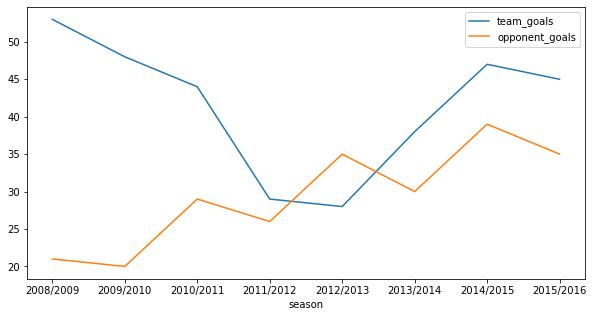

In [17]:
goals_per_season.plot(figsize=(10,5))

<AxesSubplot:xlabel='season'>

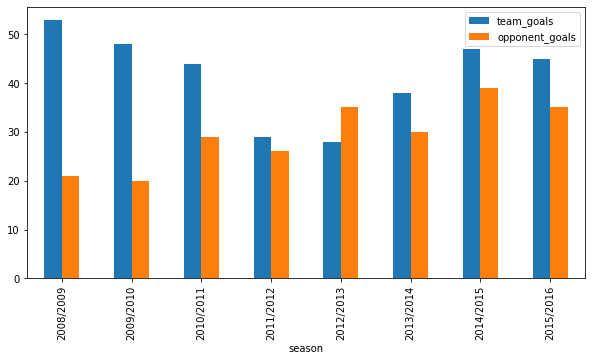

In [18]:
goals_per_season.plot(kind='bar', figsize=(10,5))

<AxesSubplot:xlabel='season'>

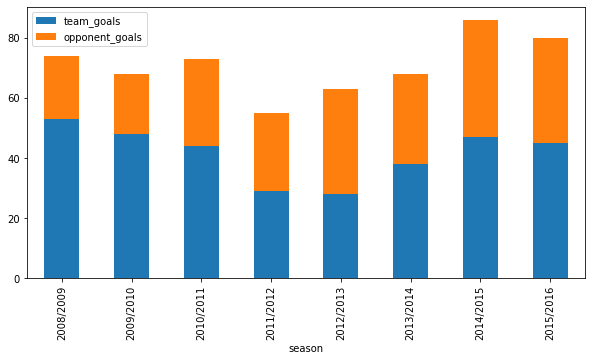

In [20]:
goals_per_season.plot(kind='bar', stacked=True, figsize=(10,5))

<AxesSubplot:ylabel='season'>

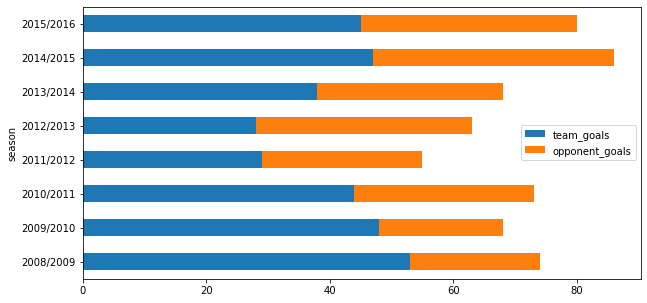

In [21]:
goals_per_season.plot(kind='barh', stacked=True, figsize=(10,5))